In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data= pd.read_excel("Detalle precios y productos fabricados 2022.xlsx")
data

In [6]:
#Verificamos que no haya valores nulos
valores_nulos= data.isnull().sum()
valores_nulos

CVE_DOC                      0
FECHA_DOC                    0
NOMBRE_VENDEDOR              0
NOMBRE_CLIENTE               0
CANT                         0
CVE_ART                      0
DESCR                        0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64

In [5]:
#Cuerta método de sustitucion de valores nulos
#Sustituir valores nulos por string en concreto
data["NOMBRE_VENDEDOR"]= data["NOMBRE_VENDEDOR"].fillna("VENDEDOR")

In [27]:
cuantitativas = data.iloc[:, list(range(7, 14)) + [4]]
cualitativas = data.iloc[:, list(range(0, 3)) + [5, 6]]

In [16]:
cualitativas

,CVE_DOC,FECHA_DOC,NOMBRE_VENDEDOR,CVE_ART,DESCR
0,F37034,2022-01-05,LETICIA RAMIREZ HERNANDEZ,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V"
1,F37036,2022-01-05,LETICIA RAMIREZ HERNANDEZ,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT"
2,F37041,2022-01-05,DIEGO ARMANDO LEON DURAN,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT
3,F37042,2022-01-05,DIEGO ARMANDO LEON DURAN,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT
4,F37043,2022-01-05,LETICIA RAMIREZ HERNANDEZ,BP00242,BAN P INOX 115MMX235MM 1000W 127V T/TOR
...,...,...,...,...,...
1421,F39834,2022-12-23,LETICIA RAMIREZ HERNANDEZ,CS12F1040A00,"CAS INOX 1/2""ØX3"" 400W 127V EXT.30CM"
1422,F39834,2022-12-23,LETICIA RAMIREZ HERNANDEZ,CS12H1050A00,"CAS INOX 1/2""ØX4"" 500W 127V EXT30CM"
1423,F39835,2022-12-23,LETICIA RAMIREZ HERNANDEZ,TUE00394,"TUB INOX 5/16""ØX300MM 5300W 220V ""M"" ESP"
1424,F39837,2022-12-23,LETICIA RAMIREZ HERNANDEZ,TUA00470,"TUB INOX 1/2""ØX500MM 10KW 220V 2 1/2""NPT"


In [28]:
cuantitativas

,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO,CANT
0,434.48,52.80,52.80,434.48,52.80,381.68,381.68,1
1,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87,1
2,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56,7
3,140.00,38.96,38.96,140.00,38.96,101.04,101.04,1
4,172.41,101.71,101.71,344.83,203.42,70.71,141.41,2
...,...,...,...,...,...,...,...,...
1421,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12,6
1422,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48,6
1423,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41,3
1424,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49,4025.49,1


<Figure size 1500x800 with 0 Axes>

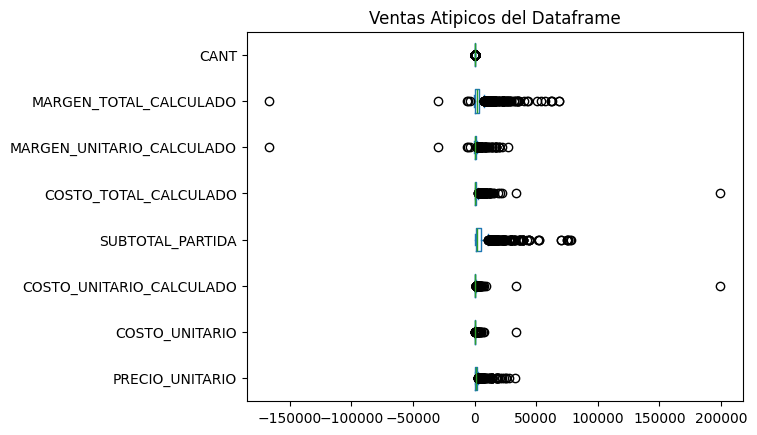

In [30]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
ig= plt.figure(figsize=(15,8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Ventas Atipicos del Dataframe")
plt.show()

**PROCEDIMIENTO "DESVIACION ESTANDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [29]:
#Metodo aplicando desviacion estandar. Encuentro los valores extremos
y=cuantitativas
Limite_Superior=y.mean() + 3*y.std()
Limite_Inferior=y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido PRECIO_UNITARIO               9533.970813
COSTO_UNITARIO                3313.473534
COSTO_UNITARIO_CALCULADO     16686.790475
SUBTOTAL_PARTIDA             31402.663810
COSTO_TOTAL_CALCULADO        18629.377526
MARGEN_UNITARIO_CALCULADO    16001.398440
MARGEN_TOTAL_CALCULADO       28691.369713
CANT                            22.531793
dtype: float64
Limite inferior permitido PRECIO_UNITARIO              -6499.204684
COSTO_UNITARIO               -2821.614250
COSTO_UNITARIO_CALCULADO    -15603.765678
SUBTOTAL_PARTIDA            -21404.897036
COSTO_TOTAL_CALCULADO       -15803.336348
MARGEN_UNITARIO_CALCULADO   -14049.656995
MARGEN_TOTAL_CALCULADO      -21519.643893
CANT                           -14.324219
dtype: float64


In [31]:
#Obtenemos datos y outliers se conierten en valores nulos
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO,CANT
0,434.48,52.80,52.80,434.48,52.80,381.68,381.68,1.0
1,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87,1.0
2,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56,7.0
3,140.00,38.96,38.96,140.00,38.96,101.04,101.04,1.0
4,172.41,101.71,101.71,344.83,203.42,70.71,141.41,2.0
...,...,...,...,...,...,...,...,...
1421,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12,6.0
1422,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48,6.0
1423,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41,3.0
1424,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49,4025.49,1.0


In [32]:
#Verificamos valores nulos que son los que se salieron de rango(outliers)
valores_nulos=data3.isnull().sum()
valores_nulos

PRECIO_UNITARIO              29
COSTO_UNITARIO               10
COSTO_UNITARIO_CALCULADO      2
SUBTOTAL_PARTIDA             36
COSTO_TOTAL_CALCULADO         5
MARGEN_UNITARIO_CALCULADO    13
MARGEN_TOTAL_CALCULADO       24
CANT                         28
dtype: int64

In [33]:
#Reemplazamos valoers atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(), 1))
data_clean

,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO,CANT
0,434.48,52.80,52.80,434.48,52.80,381.68,381.68,1.0
1,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87,1.0
2,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56,7.0
3,140.00,38.96,38.96,140.00,38.96,101.04,101.04,1.0
4,172.41,101.71,101.71,344.83,203.42,70.71,141.41,2.0
...,...,...,...,...,...,...,...,...
1421,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12,6.0
1422,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48,6.0
1423,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41,3.0
1424,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49,4025.49,1.0


In [34]:
#Corroboramos valores nulos del dataframe
valores_nulos=data_clean.isnull().sum()
valores_nulos

PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
CANT                         0
dtype: int64

**PROCEDIMIENTO "CUARTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [35]:
y=cuantitativas

percentiles25=y.quantile(0.25)#Q1
percentiles75=y.quantile(0.75)#Q3
iqr= percentiles75 - percentiles25

Limite_Superior_iqr= percentiles75 + 1.5*iqr
Limite_Inferior_iqr= percentiles25 - 1.5*iqr
print("Limite superior permitido",Limite_Superior_iqr)
print("Limite inderior permitido",Limite_Inferior_iqr)

Limite superior permitido PRECIO_UNITARIO               2954.86625
COSTO_UNITARIO                 567.95000
COSTO_UNITARIO_CALCULADO       807.81375
SUBTOTAL_PARTIDA             10783.51250
COSTO_TOTAL_CALCULADO         2971.36250
MARGEN_UNITARIO_CALCULADO     2089.94625
MARGEN_TOTAL_CALCULADO        7807.59750
CANT                             8.50000
dtype: float64
Limite inderior permitido PRECIO_UNITARIO              -927.40375
COSTO_UNITARIO               -340.77000
COSTO_UNITARIO_CALCULADO     -340.87625
SUBTOTAL_PARTIDA            -4946.78750
COSTO_TOTAL_CALCULADO       -1506.25750
MARGEN_UNITARIO_CALCULADO    -621.22375
MARGEN_TOTAL_CALCULADO      -3594.42250
CANT                           -3.50000
dtype: float64


In [36]:
data3_iqr= cuantitativas[(y<=Limite_Superior_iqr) & (y>=Limite_Inferior_iqr)]
data3_iqr

,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO,CANT
0,434.48,52.80,52.80,434.48,52.80,381.68,381.68,1.0
1,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87,1.0
2,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56,7.0
3,140.00,38.96,38.96,140.00,38.96,101.04,101.04,1.0
4,172.41,101.71,101.71,344.83,203.42,70.71,141.41,2.0
...,...,...,...,...,...,...,...,...
1421,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12,6.0
1422,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48,6.0
1423,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41,3.0
1424,NaN,NaN,NaN,5909.84,1884.35,NaN,4025.49,1.0


In [37]:
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

PRECIO_UNITARIO              127
COSTO_UNITARIO               128
COSTO_UNITARIO_CALCULADO     144
SUBTOTAL_PARTIDA             159
COSTO_TOTAL_CALCULADO        162
MARGEN_UNITARIO_CALCULADO    132
MARGEN_TOTAL_CALCULADO       168
CANT                         169
dtype: int64

In [38]:
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO,CANT
0,434.48,52.80,52.80,434.48,52.80,381.68,381.68,1.0
1,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87,1.0
2,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56,7.0
3,140.00,38.96,38.96,140.00,38.96,101.04,101.04,1.0
4,172.41,101.71,101.71,344.83,203.42,70.71,141.41,2.0
...,...,...,...,...,...,...,...,...
1421,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12,6.0
1422,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48,6.0
1423,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41,3.0
1424,942.70,108.00,219.90,5909.84,1884.35,684.80,4025.49,1.0


In [39]:
Datos_limpios=pd.concat([cualitativas,data4_iqr],axis=1)
Datos_limpios

,CVE_DOC,FECHA_DOC,NOMBRE_VENDEDOR,CVE_ART,DESCR,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO,CANT
0,F37034,2022-01-05,LETICIA RAMIREZ HERNANDEZ,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V",434.48,52.80,52.80,434.48,52.80,381.68,381.68,1.0
1,F37036,2022-01-05,LETICIA RAMIREZ HERNANDEZ,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT",1264.05,327.18,327.18,1264.05,327.18,936.87,936.87,1.0
2,F37041,2022-01-05,DIEGO ARMANDO LEON DURAN,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56,7.0
3,F37042,2022-01-05,DIEGO ARMANDO LEON DURAN,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT,140.00,38.96,38.96,140.00,38.96,101.04,101.04,1.0
4,F37043,2022-01-05,LETICIA RAMIREZ HERNANDEZ,BP00242,BAN P INOX 115MMX235MM 1000W 127V T/TOR,172.41,101.71,101.71,344.83,203.42,70.71,141.41,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,F39834,2022-12-23,LETICIA RAMIREZ HERNANDEZ,CS12F1040A00,"CAS INOX 1/2""ØX3"" 400W 127V EXT.30CM",712.00,102.31,102.31,4272.00,613.88,609.69,3658.12,6.0
1422,F39834,2022-12-23,LETICIA RAMIREZ HERNANDEZ,CS12H1050A00,"CAS INOX 1/2""ØX4"" 500W 127V EXT30CM",718.60,104.69,104.69,4311.60,628.12,613.91,3683.48,6.0
1423,F39835,2022-12-23,LETICIA RAMIREZ HERNANDEZ,TUE00394,"TUB INOX 5/16""ØX300MM 5300W 220V ""M"" ESP",2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41,3.0
1424,F39837,2022-12-23,LETICIA RAMIREZ HERNANDEZ,TUA00470,"TUB INOX 1/2""ØX500MM 10KW 220V 2 1/2""NPT",942.70,108.00,219.90,5909.84,1884.35,684.80,4025.49,1.0


In [41]:
#Corroboramos valores nulos del dataframe
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

CVE_DOC                      0
FECHA_DOC                    0
NOMBRE_VENDEDOR              0
CVE_ART                      0
DESCR                        0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
CANT                         0
dtype: int64

In [ ]:
Datos_limpios.to_csv("Datos_limpios.csv")